In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import scipy.stats as stats
from sklearn.metrics import classification_report , accuracy_score , recall_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

C:\Users\suyas\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("C:/Users/suyas/Desktop/New folder/Project/Credit/Customer_Data.csv")

C:\Users\suyas\AppData\Local\Temp\ipykernel_3952\2159750200.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:/Users/suyas/Desktop/New folder/Project/Credit/Customer_Data.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       100000 non-null  object 
 1   Customer_ID              100000 non-null  object 
 2   Month                    100000 non-null  object 
 3   Name                     90015 non-null   object 
 4   Age                      100000 non-null  object 
 5   SSN                      100000 non-null  object 
 6   Occupation               100000 non-null  object 
 7   Annual_Income            100000 non-null  object 
 8   Monthly_Inhand_Salary    84998 non-null   float64
 9   Num_Bank_Accounts        100000 non-null  int64  
 10  Interest_Rate            100000 non-null  int64  
 11  Num_of_Loan              100000 non-null  object 
 12  Type_of_Loan             88592 non-null   object 
 13  Delay_from_due_date      100000 non-null  int64  
 14  Num_o

In [4]:
df.shape

(100000, 25)

In [5]:
df.dtypes

ID                          object
Customer_ID                 object
Month                       object
Name                        object
Age                         object
SSN                         object
Occupation                  object
Annual_Income               object
Monthly_Inhand_Salary      float64
Num_Bank_Accounts            int64
Interest_Rate                int64
Num_of_Loan                 object
Type_of_Loan                object
Delay_from_due_date          int64
Num_of_Delayed_Payment      object
Num_Credit_Inquiries       float64
Credit_Mix                  object
Outstanding_Debt            object
Credit_History_Age          object
Payment_of_Min_Amount       object
Total_EMI_per_month        float64
Amount_invested_monthly     object
Payment_Behaviour           object
Monthly_Balance             object
Credit_Score                object
dtype: object

In [6]:
df.isnull().sum()/len(df)*100

ID                          0.000
Customer_ID                 0.000
Month                       0.000
Name                        9.985
Age                         0.000
SSN                         0.000
Occupation                  0.000
Annual_Income               0.000
Monthly_Inhand_Salary      15.002
Num_Bank_Accounts           0.000
Interest_Rate               0.000
Num_of_Loan                 0.000
Type_of_Loan               11.408
Delay_from_due_date         0.000
Num_of_Delayed_Payment      7.002
Num_Credit_Inquiries        1.965
Credit_Mix                  0.000
Outstanding_Debt            0.000
Credit_History_Age          9.030
Payment_of_Min_Amount       0.000
Total_EMI_per_month         0.000
Amount_invested_monthly     4.479
Payment_Behaviour           0.000
Monthly_Balance             1.200
Credit_Score                0.000
dtype: float64

In [7]:
dfnew=df.dropna()
dfnew

ID Customer_ID     Month             Name  Age          SSN  \
0       0x1602   CUS_0xd40   January    Aaron Maashoh   23  821-00-0265   
6       0x1608   CUS_0xd40      July    Aaron Maashoh   23  821-00-0265   
8       0x160e  CUS_0x21b1   January  Rick Rothackerj  28_  004-07-5839   
9       0x160f  CUS_0x21b1  February  Rick Rothackerj   28  004-07-5839   
10      0x1610  CUS_0x21b1     March  Rick Rothackerj   28  004-07-5839   
...        ...         ...       ...              ...  ...          ...   
99994  0x25fe8  CUS_0x942c     March            Nicks   25  078-73-5990   
99995  0x25fe9  CUS_0x942c     April            Nicks   25  078-73-5990   
99996  0x25fea  CUS_0x942c       May            Nicks   25  078-73-5990   
99997  0x25feb  CUS_0x942c      June            Nicks   25  078-73-5990   
99999  0x25fed  CUS_0x942c    August            Nicks   25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
6      Scientist      19114.12            1824.843333                  3  ...   
8        _______      34847.84            3037.986667                  2  ...   
9        Teacher      34847.84            3037.986667                  2  ...   
10       Teacher     34847.84_            3037.986667                  2  ...   
...          ...           ...                    ...                ...  ...   
99994   Mechanic      39628.99            3359.415833                  4  ...   
99995   Mechanic      39628.99            3359.415833                  4  ...   
99996   Mechanic      39628.99            3359.415833                  4  ...   
99997   Mechanic      39628.99            3359.415833                  4  ...   
99999   Mechanic     39628.99_            3359.415833                  4  ...   

       Num_Credit_Inquiries Credit_Mix Outstanding_Debt  \
0                       4.0          _           809.98   
6                       4.0       Good           809.98   
8                       2.0       Good           605.03   
9                       2.0       Good           605.03   
10                      2.0          _           605.03   
...                     ...        ...              ...   
99994                   3.0          _           502.38   
99995                   3.0          _           502.38   
99996                   3.0          _           502.38   
99997                   3.0       Good           502.38   
99999                   3.0       Good           502.38   

           Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0       22 Years and 1 Months                    No            49.574949   
6       22 Years and 7 Months                    No            49.574949   
8       26 Years and 7 Months                    No            18.816215   
9       26 Years and 8 Months                    No            18.816215   
10      26 Years and 9 Months                    No            18.816215   
...                       ...                   ...                  ...   
99994   31 Years and 5 Months                    No            35.104023   
99995   31 Years and 6 Months                    No            35.104023   
99996   31 Years and 7 Months                    No            35.104023   
99997   31 Years and 8 Months                    No            35.104023   
99999  31 Years and 10 Months                    No            35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
6           178.3440674122349    Low_spent_Small_value_payments   
8                 104.2918252    Low_spent_Small_value_payments   
9           40.39123782853101   High_spent_Large_value_payments   
10          58.51597569589465   High_spent_Large_value_payments   
...                       ...                               ...   
99994      140.58140274528395  High_spent_Mediu

In [8]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53049 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       53049 non-null  object 
 1   Customer_ID              53049 non-null  object 
 2   Month                    53049 non-null  object 
 3   Name                     53049 non-null  object 
 4   Age                      53049 non-null  object 
 5   SSN                      53049 non-null  object 
 6   Occupation               53049 non-null  object 
 7   Annual_Income            53049 non-null  object 
 8   Monthly_Inhand_Salary    53049 non-null  float64
 9   Num_Bank_Accounts        53049 non-null  int64  
 10  Interest_Rate            53049 non-null  int64  
 11  Num_of_Loan              53049 non-null  object 
 12  Type_of_Loan             53049 non-null  object 
 13  Delay_from_due_date      53049 non-null  int64  
 14  Num_of_Delayed_Payment

In [9]:
data_lost=(len(df)-len(dfnew))*100/len(df)
f"Data Lost-{data_lost:0.2f} %"

'Data Lost-46.95 %'

In [10]:
df.drop("Name",axis=1,inplace=True)

In [11]:

df.head()

ID Customer_ID     Month   Age          SSN Occupation Annual_Income  \
0  0x1602   CUS_0xd40   January    23  821-00-0265  Scientist      19114.12   
1  0x1603   CUS_0xd40  February    23  821-00-0265  Scientist      19114.12   
2  0x1604   CUS_0xd40     March  -500  821-00-0265  Scientist      19114.12   
3  0x1605   CUS_0xd40     April    23  821-00-0265  Scientist      19114.12   
4  0x1606   CUS_0xd40       May    23  821-00-0265  Scientist      19114.12   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Interest_Rate  ...  \
0            1824.843333                  3              3  ...   
1                    NaN                  3              3  ...   
2                    NaN                  3              3  ...   
3                    NaN                  3              3  ...   
4            1824.843333                  3              3  ...   

  Num_Credit_Inquiries Credit_Mix  Outstanding_Debt     Credit_History_Age  \
0                  4.0          _            809.98  22 Years and 1 Months   
1                  4.0       Good            809.98                    NaN   
2                  4.0       Good            809.98  22 Years and 3 Months   
3                  4.0       Good            809.98  22 Years and 4 Months   
4                  4.0       Good            809.98  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949             81.69952126   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance  Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663          Good  
1    Low_spent_Large_value_payments  284.62916249607184          Good  
2   Low_spent_Medium_value_payments   331.2098628537912          Good  
3    Low_spent_Small_value_payments  223.45130972736786          Good  
4  High_spent_Medium_value_payments  341.48923103222177          Good  

[5 rows x 24 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       100000 non-null  object 
 1   Customer_ID              100000 non-null  object 
 2   Month                    100000 non-null  object 
 3   Age                      100000 non-null  object 
 4   SSN                      100000 non-null  object 
 5   Occupation               100000 non-null  object 
 6   Annual_Income            100000 non-null  object 
 7   Monthly_Inhand_Salary    84998 non-null   float64
 8   Num_Bank_Accounts        100000 non-null  int64  
 9   Interest_Rate            100000 non-null  int64  
 10  Num_of_Loan              100000 non-null  object 
 11  Type_of_Loan             88592 non-null   object 
 12  Delay_from_due_date      100000 non-null  int64  
 13  Num_of_Delayed_Payment   92998 non-null   object 
 14  Num_C

In [13]:
df.describe().transpose()

count         mean          std         min  \
Monthly_Inhand_Salary   84998.0  4194.170850  3183.686167  303.645417   
Num_Bank_Accounts      100000.0    17.091280   117.404834   -1.000000   
Interest_Rate          100000.0    72.466040   466.422621    1.000000   
Delay_from_due_date    100000.0    21.068780    14.860104   -5.000000   
Num_Credit_Inquiries    98035.0    27.754251   193.177339    0.000000   
Total_EMI_per_month    100000.0  1403.118217  8306.041270    0.000000   

                               25%          50%          75%           max  
Monthly_Inhand_Salary  1625.568229  3093.745000  5957.448333  15204.633333  
Num_Bank_Accounts         3.000000     6.000000     7.000000   1798.000000  
Interest_Rate             8.000000    13.000000    20.000000   5797.000000  
Delay_from_due_date      10.000000    18.000000    28.000000     67.000000  
Num_Credit_Inquiries      3.000000     6.000000     9.000000   2597.000000  
Total_EMI_per_month      30.306660    69.249473   161.224249  82331.000000

# ---------------Credit_Score------------------

In [14]:
df["Credit_Score"]

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
99995        Poor
99996        Poor
99997        Poor
99998    Standard
99999        Poor
Name: Credit_Score, Length: 100000, dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df["credit__score_label"]=lb.fit_transform(df["Credit_Score"])

good=0 standard=2 poor=1

In [16]:
df.drop("Credit_Score",axis=1,inplace=True)

In [17]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'credit__score_label'],
      dtype='object')

here a lot of columns are out of model scope ,redundant and not so useful in this particular context of the issue at the hand so we have to drop them,name column was already dropped

In [18]:
drop_df = df.drop(['ID','Customer_ID','Month','SSN','Num_Bank_Accounts',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Amount_invested_monthly'], axis=1).copy()
drop_df

Age Occupation Annual_Income  Monthly_Inhand_Salary  \
0        23  Scientist      19114.12            1824.843333   
1        23  Scientist      19114.12                    NaN   
2      -500  Scientist      19114.12                    NaN   
3        23  Scientist      19114.12                    NaN   
4        23  Scientist      19114.12            1824.843333   
...     ...        ...           ...                    ...   
99995    25   Mechanic      39628.99            3359.415833   
99996    25   Mechanic      39628.99            3359.415833   
99997    25   Mechanic      39628.99            3359.415833   
99998    25   Mechanic      39628.99            3359.415833   
99999    25   Mechanic     39628.99_            3359.415833   

       Delay_from_due_date Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                        3                      7                   4.0   
1                       -1                    NaN                   4.0   
2                        3                      7                   4.0   
3                        5                      4                   4.0   
4                        6                    NaN                   4.0   
...                    ...                    ...                   ...   
99995                   23                      7                   3.0   
99996                   18                      7                   3.0   
99997                   27                      6                   3.0   
99998                   20                    NaN                   3.0   
99999                   18                      6                   3.0   

      Credit_Mix Outstanding_Debt      Credit_History_Age  \
0              _           809.98   22 Years and 1 Months   
1           Good           809.98                     NaN   
2           Good           809.98   22 Years and 3 Months   
3           Good           809.98   22 Years and 4 Months   
4           Good           809.98   22 Years and 5 Months   
...          ...              ...                     ...   
99995          _           502.38   31 Years and 6 Months   
99996          _           502.38   31 Years and 7 Months   
99997       Good           502.38   31 Years and 8 Months   
99998       Good           502.38   31 Years and 9 Months   
99999       Good           502.38  31 Years and 10 Months   

      Payment_of_Min_Amount  Total_EMI_per_month  \
0                        No            49.574949   
1                        No            49.574949   
2                        No            49.574949   
3                        No            49.574949   
4                        No            49.574949   
...                     ...                  ...   
99995                    No            35.104023   
99996                    No            35.104023   
99997                    No            35.104023   
99998                    No            35.104023   
99999                    No            35.104023   

                      Payment_Behaviour     Monthly_Balance  \
0       High_spent_Small_value_payments  312.49408867943663   
1        Low_spent_Large_value_payments  284.62916249607184   
2       Low_spent_Medium_value_payments   331.2098628537912   
3        Low_spent_Small_value_payments  223.45130972736786   
4      High_spent_Medium_value_payments  341.48923103222177   
...                                 ...                 ...   
99995   High_spent_Large_value_payments          479.866228   
99996  High_spent_Medium_value_payments           496.65161   
99997   High_spent_Large_value_payments          516.809083   
99998    Low_spent_Large_value_payments          319.164979   
99999                            !@9#%8          393.673696   

       credit__score_label  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
99995                    1  
999

# ----------AGE----------------

In [19]:
drop_df["Age"]

0          23
1          23
2        -500
3          23
4          23
         ... 
99995      25
99996      25
99997      25
99998      25
99999      25
Name: Age, Length: 100000, dtype: object

In [20]:
def filter_col(value):
    if '-' in value:
        return value.split('-')[1]
    elif '_' in value:
        return value.split('_')[0]
    else:
        return value

In [21]:
type(df["Age"])

pandas.core.series.Series

In [22]:
drop_df["Age"] = drop_df["Age"].apply(filter_col)
drop_df["Age"] = drop_df["Age"].astype(int)

In [23]:
for i in range(len(drop_df["Age"])):
    if drop_df["Age"][i] > 90 or drop_df["Age"][i] < 10:
        drop_df["Age"][i] = np.nan
    else:
        drop_df["Age"][i] = drop_df["Age"][i]

C:\Users\suyas\AppData\Local\Temp\ipykernel_3952\2827531744.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_df["Age"][i] = drop_df["Age"][i]
C:\Users\suyas\AppData\Local\Temp\ipykernel_3952\2827531744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_df["Age"][i] = np.nan


In [24]:
drop_df["Age"]

0        23.0
1        23.0
2         NaN
3        23.0
4        23.0
         ... 
99995    25.0
99996    25.0
99997    25.0
99998    25.0
99999    25.0
Name: Age, Length: 100000, dtype: float64

In [25]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     97219 non-null   float64
 1   Occupation              100000 non-null  object 
 2   Annual_Income           100000 non-null  object 
 3   Monthly_Inhand_Salary   84998 non-null   float64
 4   Delay_from_due_date     100000 non-null  int64  
 5   Num_of_Delayed_Payment  92998 non-null   object 
 6   Num_Credit_Inquiries    98035 non-null   float64
 7   Credit_Mix              100000 non-null  object 
 8   Outstanding_Debt        100000 non-null  object 
 9   Credit_History_Age      90970 non-null   object 
 10  Payment_of_Min_Amount   100000 non-null  object 
 11  Total_EMI_per_month     100000 non-null  float64
 12  Payment_Behaviour       100000 non-null  object 
 13  Monthly_Balance         98800 non-null   object 
 14  credit__score_label  

In [26]:
drop_df["Occupation"].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [27]:
drop_df["Occupation"].replace("_______",np.nan,inplace=True)

In [28]:
drop_df["Occupation"]=drop_df["Occupation"].astype("object")

In [29]:
drop_df["Occupation"].value_counts()

Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [30]:
drop_df

Age Occupation Annual_Income  Monthly_Inhand_Salary  \
0      23.0  Scientist      19114.12            1824.843333   
1      23.0  Scientist      19114.12                    NaN   
2       NaN  Scientist      19114.12                    NaN   
3      23.0  Scientist      19114.12                    NaN   
4      23.0  Scientist      19114.12            1824.843333   
...     ...        ...           ...                    ...   
99995  25.0   Mechanic      39628.99            3359.415833   
99996  25.0   Mechanic      39628.99            3359.415833   
99997  25.0   Mechanic      39628.99            3359.415833   
99998  25.0   Mechanic      39628.99            3359.415833   
99999  25.0   Mechanic     39628.99_            3359.415833   

       Delay_from_due_date Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                        3                      7                   4.0   
1                       -1                    NaN                   4.0   
2                        3                      7                   4.0   
3                        5                      4                   4.0   
4                        6                    NaN                   4.0   
...                    ...                    ...                   ...   
99995                   23                      7                   3.0   
99996                   18                      7                   3.0   
99997                   27                      6                   3.0   
99998                   20                    NaN                   3.0   
99999                   18                      6                   3.0   

      Credit_Mix Outstanding_Debt      Credit_History_Age  \
0              _           809.98   22 Years and 1 Months   
1           Good           809.98                     NaN   
2           Good           809.98   22 Years and 3 Months   
3           Good           809.98   22 Years and 4 Months   
4           Good           809.98   22 Years and 5 Months   
...          ...              ...                     ...   
99995          _           502.38   31 Years and 6 Months   
99996          _           502.38   31 Years and 7 Months   
99997       Good           502.38   31 Years and 8 Months   
99998       Good           502.38   31 Years and 9 Months   
99999       Good           502.38  31 Years and 10 Months   

      Payment_of_Min_Amount  Total_EMI_per_month  \
0                        No            49.574949   
1                        No            49.574949   
2                        No            49.574949   
3                        No            49.574949   
4                        No            49.574949   
...                     ...                  ...   
99995                    No            35.104023   
99996                    No            35.104023   
99997                    No            35.104023   
99998                    No            35.104023   
99999                    No            35.104023   

                      Payment_Behaviour     Monthly_Balance  \
0       High_spent_Small_value_payments  312.49408867943663   
1        Low_spent_Large_value_payments  284.62916249607184   
2       Low_spent_Medium_value_payments   331.2098628537912   
3        Low_spent_Small_value_payments  223.45130972736786   
4      High_spent_Medium_value_payments  341.48923103222177   
...                                 ...                 ...   
99995   High_spent_Large_value_payments          479.866228   
99996  High_spent_Medium_value_payments           496.65161   
99997   High_spent_Large_value_payments          516.809083   
99998    Low_spent_Large_value_payments          319.164979   
99999                            !@9#%8          393.673696   

       credit__score_label  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
99995                    1  
999

In [31]:
krna=['Age', 'Occupation', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']

# -------------------------Delay_from_due_date--------------------------

In [32]:
drop_df["Delay_from_due_date"].value_counts().sort_index()

-5      33
-4      62
-3     118
-2     168
-1     210
      ... 
 63     69
 64     64
 65     56
 66     32
 67     22
Name: Delay_from_due_date, Length: 73, dtype: int64

In [33]:
drop_df["Delay_from_due_date"].isnull().sum()

0

In [34]:
drop_df["Delay_from_due_date"] = drop_df["Delay_from_due_date"].apply(lambda x: max(x, 0))

# ------------------Num_of_Delayed_Payment-----------------------

In [35]:
drop_df["Num_of_Delayed_Payment"].isnull().sum()

7002

Here the Num_of_Delayed_Payment columns has around 7k null values dropping them dirctly could mean a significant data loss. Also directly imputating it with mean is also a bad idea consdering the fact that it could be depended on some other factor. So insted we will see the correleation of this column with other variables and then decide which column should be used to take out some metric.

In [36]:
def filter_(value:str):
    if '_' in str(value):
        return value.split('_')[0]
    else:
        return value
drop_df["Num_of_Delayed_Payment"]= drop_df["Num_of_Delayed_Payment"].apply(filter_)

In [37]:
drop_df["Num_of_Delayed_Payment"]= drop_df["Num_of_Delayed_Payment"].astype("float64")

In [38]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     97219 non-null   float64
 1   Occupation              92938 non-null   object 
 2   Annual_Income           100000 non-null  object 
 3   Monthly_Inhand_Salary   84998 non-null   float64
 4   Delay_from_due_date     100000 non-null  int64  
 5   Num_of_Delayed_Payment  92998 non-null   float64
 6   Num_Credit_Inquiries    98035 non-null   float64
 7   Credit_Mix              100000 non-null  object 
 8   Outstanding_Debt        100000 non-null  object 
 9   Credit_History_Age      90970 non-null   object 
 10  Payment_of_Min_Amount   100000 non-null  object 
 11  Total_EMI_per_month     100000 non-null  float64
 12  Payment_Behaviour       100000 non-null  object 
 13  Monthly_Balance         98800 non-null   object 
 14  credit__score_label  

# ------------Num_Credit_Inquiries-----------------

In [39]:
drop_df["Num_Credit_Inquiries"].isnull().sum()

1965

# -------------------Annual_Income------------------

In [40]:
drop_df["Annual_Income"].value_counts()

36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933       1
Name: Annual_Income, Length: 18940, dtype: int64

In [41]:
drop_df["Annual_Income"] = drop_df["Annual_Income"].apply(filter_col)
drop_df["Annual_Income"] = drop_df["Annual_Income"].astype(float)

In [42]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     97219 non-null   float64
 1   Occupation              92938 non-null   object 
 2   Annual_Income           100000 non-null  float64
 3   Monthly_Inhand_Salary   84998 non-null   float64
 4   Delay_from_due_date     100000 non-null  int64  
 5   Num_of_Delayed_Payment  92998 non-null   float64
 6   Num_Credit_Inquiries    98035 non-null   float64
 7   Credit_Mix              100000 non-null  object 
 8   Outstanding_Debt        100000 non-null  object 
 9   Credit_History_Age      90970 non-null   object 
 10  Payment_of_Min_Amount   100000 non-null  object 
 11  Total_EMI_per_month     100000 non-null  float64
 12  Payment_Behaviour       100000 non-null  object 
 13  Monthly_Balance         98800 non-null   object 
 14  credit__score_label  

In [43]:
krna=[ 'Occupation', 
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
        
        
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
      'Total_EMI_per_month', 

      
      'Payment_Behaviour', 'Monthly_Balance']

# -----------------Monthly_Balance-----------------

In [44]:
drop_df["Monthly_Balance"].isnull().sum()

1200

In [45]:
drop_df["Monthly_Balance"].value_counts()

__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.6736955618808                   1
Name: Monthly_Balance, Length: 98792, dtype: int64

In [46]:
drop_df['Monthly_Balance']=drop_df['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan)
drop_df['Monthly_Balance']=drop_df['Monthly_Balance'].astype("float")

In [47]:
drop_df['Monthly_Balance']=drop_df['Monthly_Balance'].fillna(drop_df["Monthly_Balance"].mean())
drop_df['Monthly_Balance']=drop_df['Monthly_Balance'].round(3)

In [48]:
drop_df["Monthly_Balance"].isnull().sum()

0

# ---------------Credit_History_Age------------------

In [49]:
years  = []
months = []
for value in drop_df["Credit_History_Age"]:
    if value is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = value.lower().split()
        years_ = int(new_str[0])
        months_ = int(new_str[new_str.index('and')+1])
        years.append(years_)
        months.append(months_)
drop_df['Credit_Age_years'] = pd.Series(years)
drop_df['Credit_Age_months'] = pd.Series(months) 
drop_df.drop('Credit_History_Age',axis=1,inplace=True)

In [50]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     97219 non-null   float64
 1   Occupation              92938 non-null   object 
 2   Annual_Income           100000 non-null  float64
 3   Monthly_Inhand_Salary   84998 non-null   float64
 4   Delay_from_due_date     100000 non-null  int64  
 5   Num_of_Delayed_Payment  92998 non-null   float64
 6   Num_Credit_Inquiries    98035 non-null   float64
 7   Credit_Mix              100000 non-null  object 
 8   Outstanding_Debt        100000 non-null  object 
 9   Payment_of_Min_Amount   100000 non-null  object 
 10  Total_EMI_per_month     100000 non-null  float64
 11  Payment_Behaviour       100000 non-null  object 
 12  Monthly_Balance         100000 non-null  float64
 13  credit__score_label     100000 non-null  int32  
 14  Credit_Age_years     

# -----------Credit_Mix------------------

In [51]:
drop_df["Credit_Mix"].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [52]:
drop_df['Credit_Mix']=drop_df['Credit_Mix'].replace('_',np.nan)

In [53]:
lc=LabelEncoder()
drop_df["Credit_Mix"]=lc.fit_transform(drop_df["Credit_Mix"])

In [54]:
drop_df["Credit_Mix"].value_counts()

2    36479
1    24337
3    20195
0    18989
Name: Credit_Mix, dtype: int64

# --------------Payment_Behaviour----------------

In [55]:
drop_df["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [56]:
drop_df["Payment_Behaviour"]=drop_df["Payment_Behaviour"].replace("!@9#%8",np.nan)

In [57]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
drop_df["Payment_Behaviour"]=l.fit_transform(drop_df["Payment_Behaviour"])

In [58]:
drop_df["Payment_Behaviour"].ffill(inplace=True)

In [59]:
drop_df["Payment_Behaviour"]=drop_df["Payment_Behaviour"].astype("int64")

# ---------------Outstanding_Debt------------------------

In [60]:
drop_df["Outstanding_Debt"].isna().sum()

0

In [61]:
drop_df["Outstanding_Debt"].value_counts()

1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: Outstanding_Debt, Length: 13178, dtype: int64

In [62]:
drop_df["Outstanding_Debt"] = drop_df["Outstanding_Debt"].apply(filter_col)
drop_df["Outstanding_Debt"] = drop_df["Outstanding_Debt"].astype(float)

In [63]:
drop_df["Outstanding_Debt"].value_counts()

1109.03    24
1151.70    24
1360.45    24
460.46     24
1058.13    16
           ..
4230.04     8
641.99      8
98.61       8
2614.48     8
502.38      8
Name: Outstanding_Debt, Length: 12203, dtype: int64

# ------------------Num_Credit_Inquiries---------------------

In [64]:
drop_df["Num_Credit_Inquiries"].value_counts()

4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: Num_Credit_Inquiries, Length: 1223, dtype: int64

In [65]:
(drop_df["Num_Credit_Inquiries"]<0).sum()

0

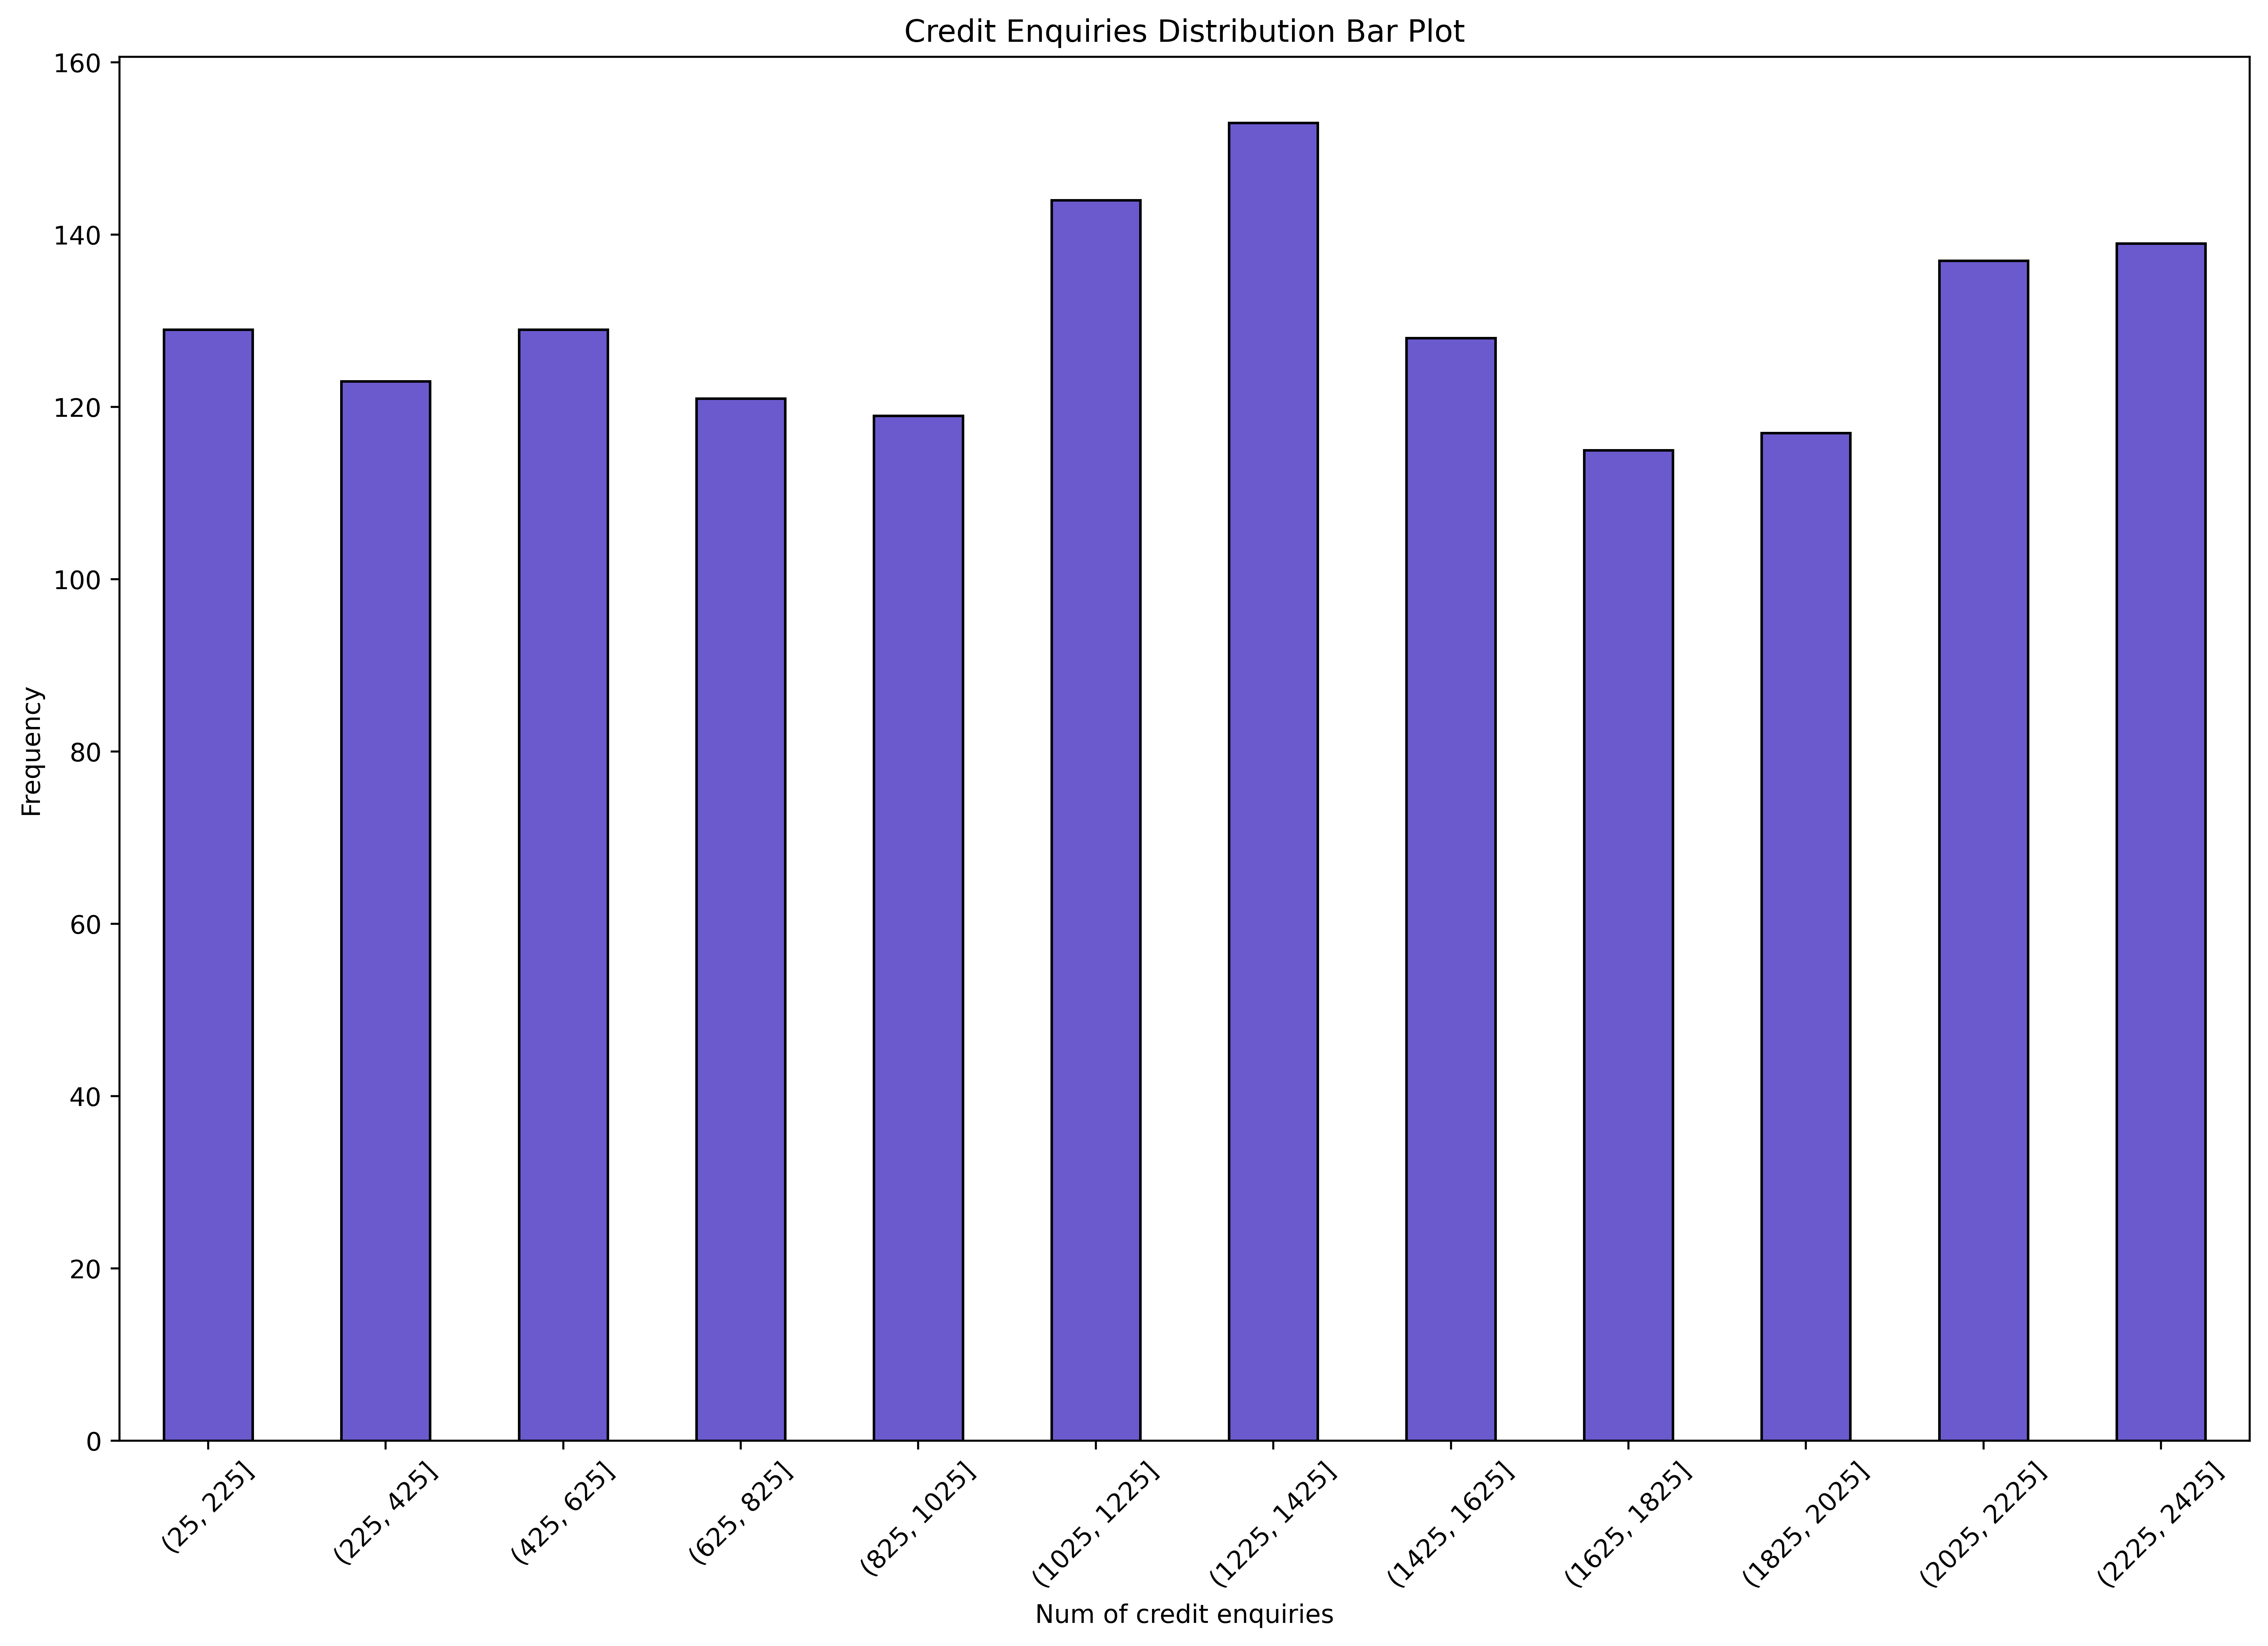

In [66]:
age_bins = range(25,2600,200)  # Define your age ranges
plt.figure(figsize=(15,10),dpi=500)

# Use pd.cut to categorize ages into bins and get the frequency count
delay_ranges = pd.cut(drop_df["Num_Credit_Inquiries"], bins=age_bins)
delay_counts = delay_ranges.value_counts().sort_index()

# Create a bar plot
delay_counts.plot(kind='bar', color='slateblue', edgecolor='black')

# Customize the plot
plt.xlabel('Num of credit enquiries')
plt.ylabel('Frequency')
plt.title('Credit Enquiries Distribution Bar Plot')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# ------------------Total_EMI_per_month----------------------

In [67]:
drop_df["Total_EMI_per_month"]=drop_df["Total_EMI_per_month"].astype("float").round(3)

In [68]:
drop_df

Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      23.0  Scientist       19114.12            1824.843333   
1      23.0  Scientist       19114.12                    NaN   
2       NaN  Scientist       19114.12                    NaN   
3      23.0  Scientist       19114.12                    NaN   
4      23.0  Scientist       19114.12            1824.843333   
...     ...        ...            ...                    ...   
99995  25.0   Mechanic       39628.99            3359.415833   
99996  25.0   Mechanic       39628.99            3359.415833   
99997  25.0   Mechanic       39628.99            3359.415833   
99998  25.0   Mechanic       39628.99            3359.415833   
99999  25.0   Mechanic       39628.99            3359.415833   

       Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                        3                     7.0                   4.0   
1                        0                     NaN                   4.0   
2                        3                     7.0                   4.0   
3                        5                     4.0                   4.0   
4                        6                     NaN                   4.0   
...                    ...                     ...                   ...   
99995                   23                     7.0                   3.0   
99996                   18                     7.0                   3.0   
99997                   27                     6.0                   3.0   
99998                   20                     NaN                   3.0   
99999                   18                     6.0                   3.0   

       Credit_Mix  Outstanding_Debt Payment_of_Min_Amount  \
0               3            809.98                    No   
1               1            809.98                    No   
2               1            809.98                    No   
3               1            809.98                    No   
4               1            809.98                    No   
...           ...               ...                   ...   
99995           3            502.38                    No   
99996           3            502.38                    No   
99997           1            502.38                    No   
99998           1            502.38                    No   
99999           1            502.38                    No   

       Total_EMI_per_month  Payment_Behaviour  Monthly_Balance  \
0                   49.575                  2          312.494   
1                   49.575                  3          284.629   
2                   49.575                  4          331.210   
3                   49.575                  5          223.451   
4                   49.575                  1          341.489   
...                    ...                ...              ...   
99995               35.104                  0          479.866   
99996               35.104                  1          496.652   
99997               35.104                  0          516.809   
99998               35.104                  3          319.165   
99999               35.104                  6          393.674   

       credit__score_label  Credit_Age_years  Credit_Age_months  
0                        0              22.0                1.0  
1                        0               NaN                NaN  
2                        0              22.0                3.0  
3                        0              22.0                4.0  
4                        0              22.0                5.0  
...                    ...               ...                ...  
99995                    1              31.0                6.0  
99996                    1              31.0                7.0  
99997                    1              31.0                8.0  
99998                    2              31.0                9.0  
99999                    1              31.0               10.0  

[100000

In [69]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     97219 non-null   float64
 1   Occupation              92938 non-null   object 
 2   Annual_Income           100000 non-null  float64
 3   Monthly_Inhand_Salary   84998 non-null   float64
 4   Delay_from_due_date     100000 non-null  int64  
 5   Num_of_Delayed_Payment  92998 non-null   float64
 6   Num_Credit_Inquiries    98035 non-null   float64
 7   Credit_Mix              100000 non-null  int32  
 8   Outstanding_Debt        100000 non-null  float64
 9   Payment_of_Min_Amount   100000 non-null  object 
 10  Total_EMI_per_month     100000 non-null  float64
 11  Payment_Behaviour       100000 non-null  int64  
 12  Monthly_Balance         100000 non-null  float64
 13  credit__score_label     100000 non-null  int32  
 14  Credit_Age_years     

In [70]:
drop_df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance',
       'credit__score_label', 'Credit_Age_years', 'Credit_Age_months'],
      dtype='object')

In [71]:
drop_df.isnull().sum()

Age                        2781
Occupation                 7062
Annual_Income                 0
Monthly_Inhand_Salary     15002
Delay_from_due_date           0
Num_of_Delayed_Payment     7002
Num_Credit_Inquiries       1965
Credit_Mix                    0
Outstanding_Debt              0
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Payment_Behaviour             0
Monthly_Balance               0
credit__score_label           0
Credit_Age_years           9030
Credit_Age_months          9030
dtype: int64

using forward fill (ffill) to impute missing values in the "Occupation" column based on the context of the "Monthly_Inhand_Salary" values. Forward fill is a method commonly used to propagate the last valid observation forward to fill gaps in the data.

In [72]:
drop_df["Monthly_Inhand_Salary"].value_counts().head(20) 

6769.130000     15
6358.956667     15
2295.058333     15
6082.187500     15
3080.555000     14
4387.272500     13
5766.491667     13
6639.560000     13
536.431250      12
1315.560833     11
2557.861667      9
1476.062917      8
2610.171667      8
9641.480000      8
11624.846667     8
1393.486667      8
1801.474167      8
7554.577500      8
1365.173333      8
1474.625417      8
Name: Monthly_Inhand_Salary, dtype: int64

In [73]:
drop_df.loc[drop_df["Monthly_Inhand_Salary"] ==1359.206250, "Occupation"]

59144    Manager
59145    Manager
59146        NaN
59147    Manager
59148    Manager
59149    Manager
59150    Manager
59151    Manager
Name: Occupation, dtype: object

In [74]:
drop_df['Occupation'].ffill(inplace=True)

In [75]:
drop_df["Monthly_Inhand_Salary"].value_counts().head(10)
drop_df.loc[drop_df["Monthly_Inhand_Salary"] ==1359.206250, "Occupation"] 
drop_df.drop('Monthly_Inhand_Salary',axis=1,inplace=True)

In [76]:
encoder = OneHotEncoder()
encoded_pay_min_amt= encoder.fit_transform(drop_df[["Payment_of_Min_Amount"]])
df_encoded = pd.DataFrame(encoded_pay_min_amt.toarray(), columns=encoder.get_feature_names_out(["Payment_of_Min_Amount"]))
combined_df = pd.concat([drop_df, df_encoded], axis=1)
combined_df.drop('Payment_of_Min_Amount',axis=1,inplace=True)

In [77]:
drop_df.isnull().sum()

Age                       2781
Occupation                   0
Annual_Income                0
Delay_from_due_date          0
Num_of_Delayed_Payment    7002
Num_Credit_Inquiries      1965
Credit_Mix                   0
Outstanding_Debt             0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Payment_Behaviour            0
Monthly_Balance              0
credit__score_label          0
Credit_Age_years          9030
Credit_Age_months         9030
dtype: int64

<AxesSubplot:>

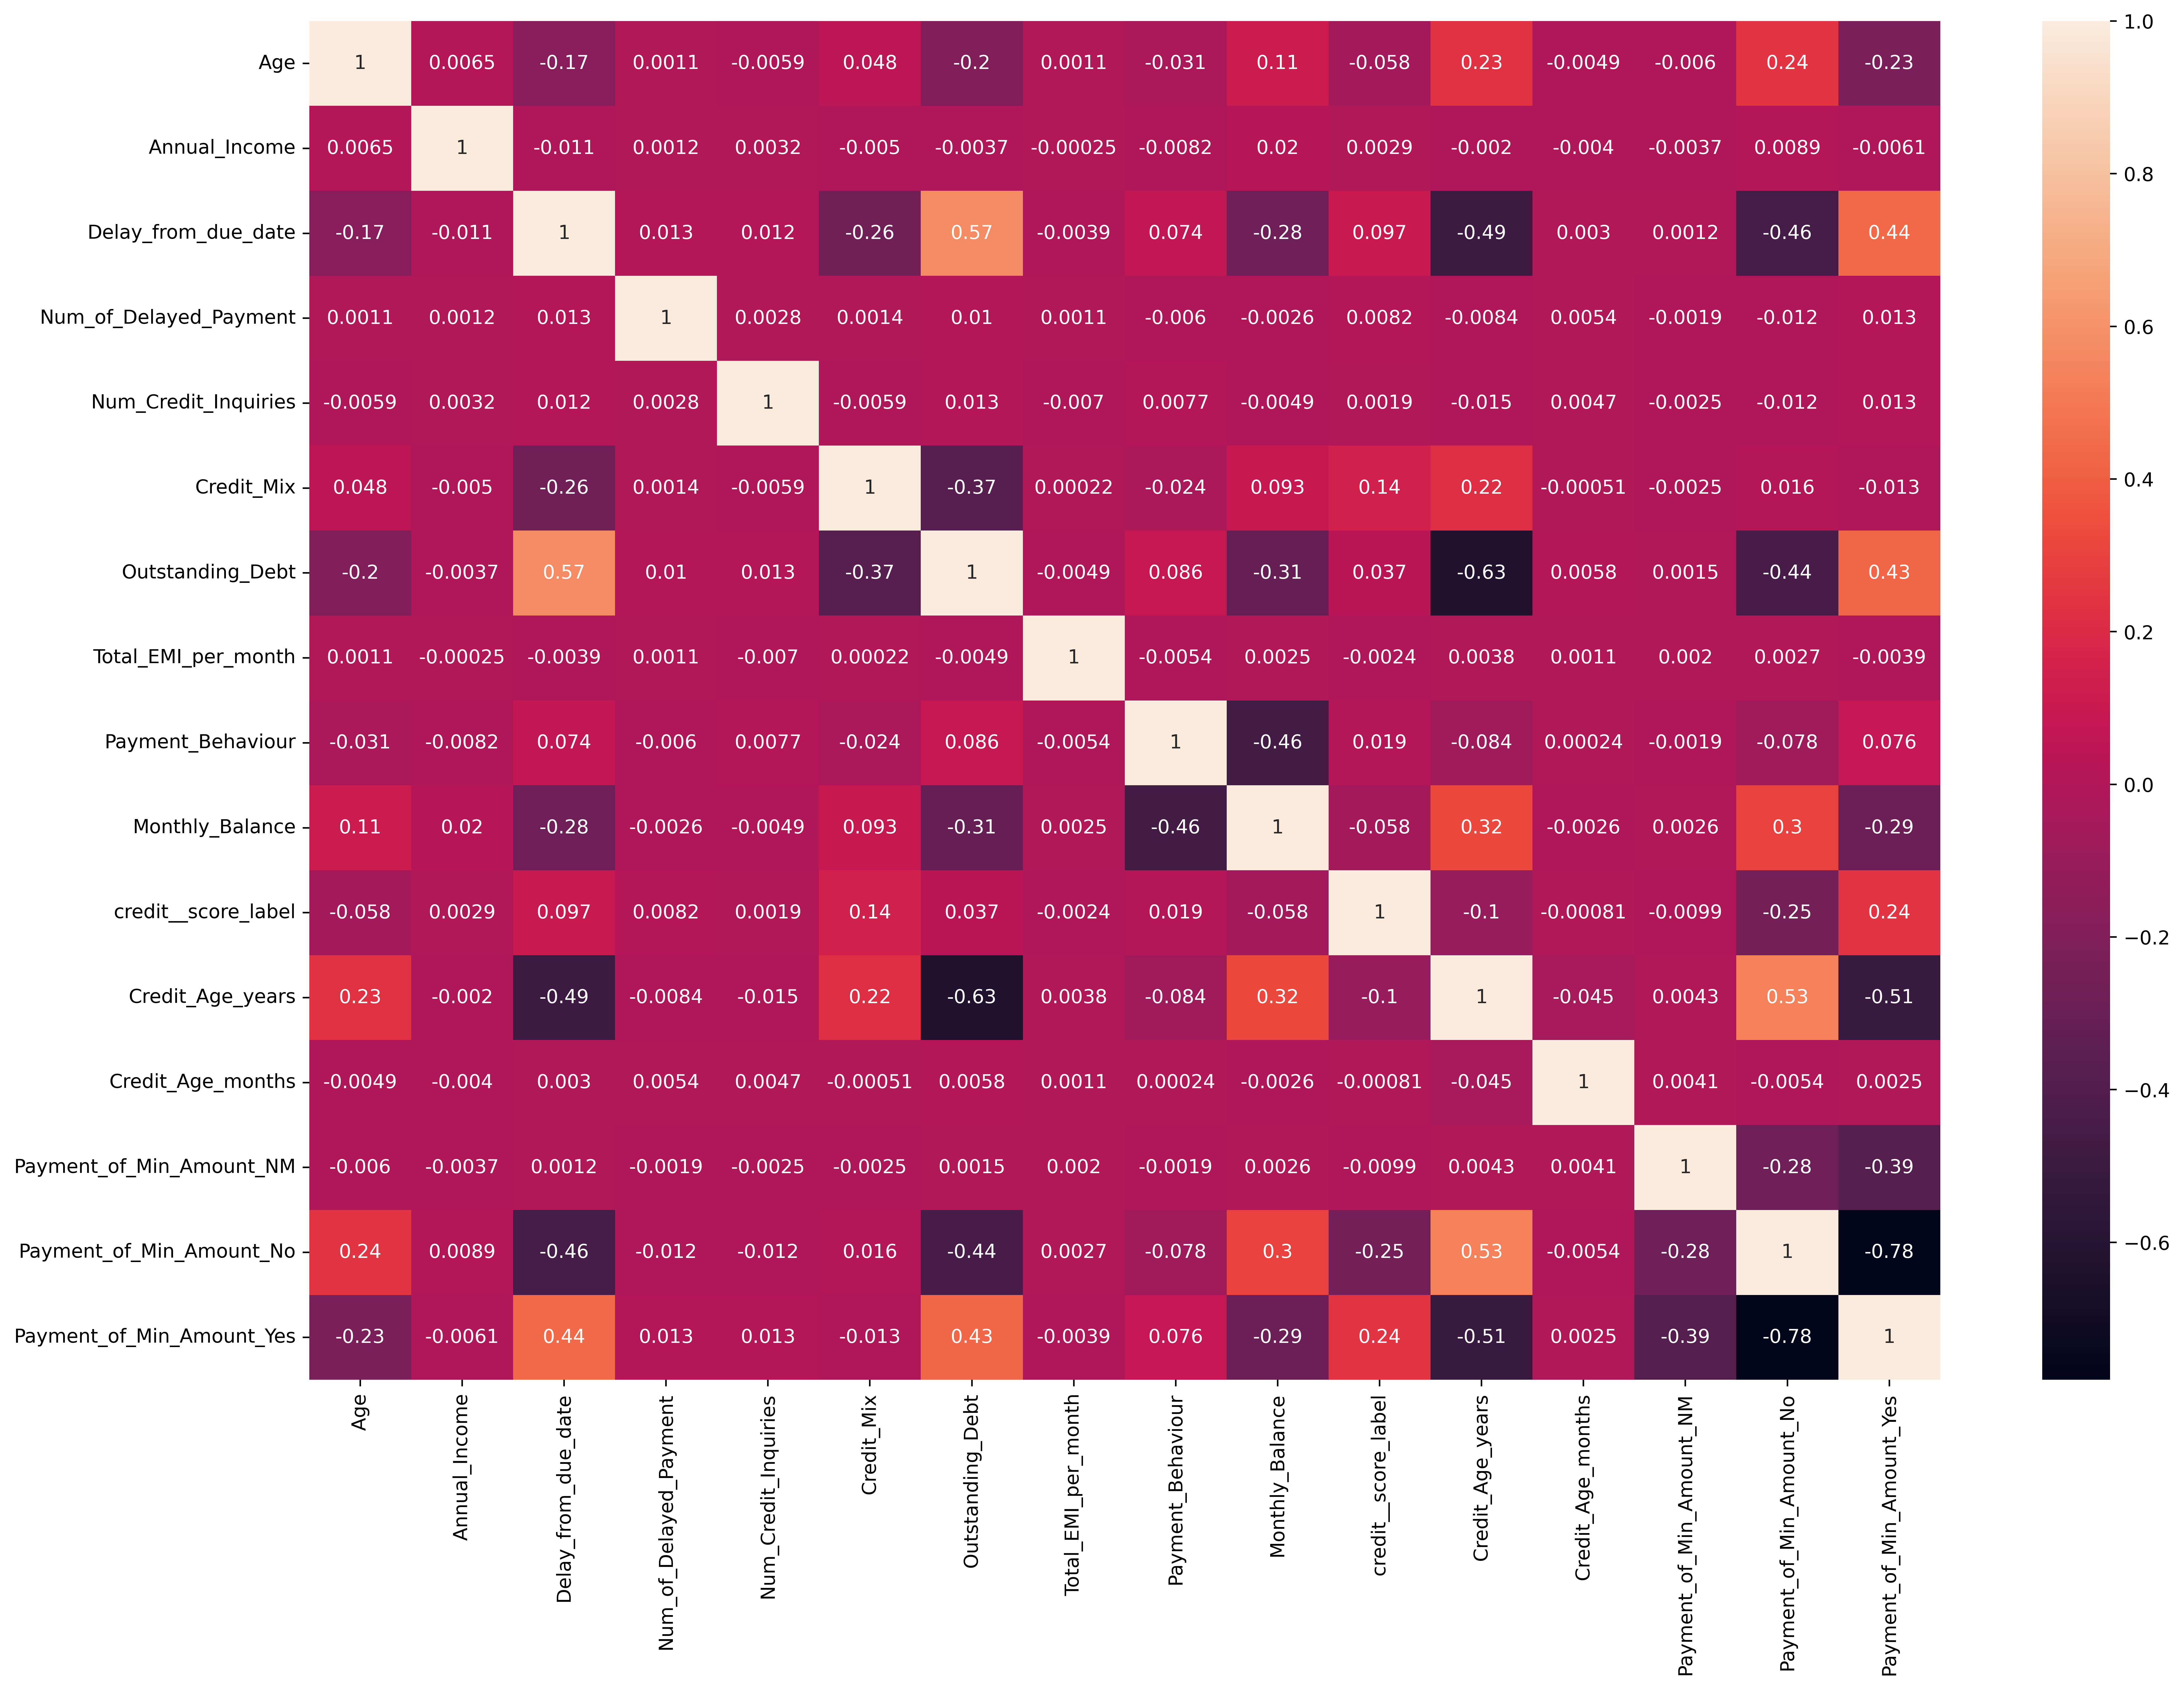

In [78]:
plt.figure(figsize=(19,13),dpi=500)
sns.heatmap(combined_df.corr(),annot=True)

In [79]:
combined_df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Monthly_Balance', 'credit__score_label', 'Credit_Age_years',
       'Credit_Age_months', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes'],
      dtype='object')

In [80]:
combined_df['credit__score_label'] = combined_df.pop("credit__score_label")

In [81]:
combined_df.head()

Age Occupation  Annual_Income  Delay_from_due_date  \
0  23.0  Scientist       19114.12                    3   
1  23.0  Scientist       19114.12                    0   
2   NaN  Scientist       19114.12                    3   
3  23.0  Scientist       19114.12                    5   
4  23.0  Scientist       19114.12                    6   

   Num_of_Delayed_Payment  Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
0                     7.0                   4.0           3            809.98   
1                     NaN                   4.0           1            809.98   
2                     7.0                   4.0           1            809.98   
3                     4.0                   4.0           1            809.98   
4                     NaN                   4.0           1            809.98   

   Total_EMI_per_month  Payment_Behaviour  Monthly_Balance  Credit_Age_years  \
0               49.575                  2          312.494              22.0   
1               49.575                  3          284.629               NaN   
2               49.575                  4          331.210              22.0   
3               49.575                  5          223.451              22.0   
4               49.575                  1          341.489              22.0   

   Credit_Age_months  Payment_of_Min_Amount_NM  Payment_of_Min_Amount_No  \
0                1.0                       0.0                       1.0   
1                NaN                       0.0                       1.0   
2                3.0                       0.0                       1.0   
3                4.0                       0.0                       1.0   
4                5.0                       0.0                       1.0   

   Payment_of_Min_Amount_Yes  credit__score_label  
0                        0.0                    0  
1                        0.0                    0  
2                        0.0                    0  
3                        0.0                    0  
4                        0.0                    0

In [82]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        97219 non-null   float64
 1   Occupation                 100000 non-null  object 
 2   Annual_Income              100000 non-null  float64
 3   Delay_from_due_date        100000 non-null  int64  
 4   Num_of_Delayed_Payment     92998 non-null   float64
 5   Num_Credit_Inquiries       98035 non-null   float64
 6   Credit_Mix                 100000 non-null  int32  
 7   Outstanding_Debt           100000 non-null  float64
 8   Total_EMI_per_month        100000 non-null  float64
 9   Payment_Behaviour          100000 non-null  int64  
 10  Monthly_Balance            100000 non-null  float64
 11  Credit_Age_years           90970 non-null   float64
 12  Credit_Age_months          90970 non-null   float64
 13  Payment_of_Min_Amount_NM   100

In [83]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        97219 non-null   float64
 1   Occupation                 100000 non-null  object 
 2   Annual_Income              100000 non-null  float64
 3   Delay_from_due_date        100000 non-null  int64  
 4   Num_of_Delayed_Payment     92998 non-null   float64
 5   Num_Credit_Inquiries       98035 non-null   float64
 6   Credit_Mix                 100000 non-null  int32  
 7   Outstanding_Debt           100000 non-null  float64
 8   Total_EMI_per_month        100000 non-null  float64
 9   Payment_Behaviour          100000 non-null  int64  
 10  Monthly_Balance            100000 non-null  float64
 11  Credit_Age_years           90970 non-null   float64
 12  Credit_Age_months          90970 non-null   float64
 13  Payment_of_Min_Amount_NM   100

<AxesSubplot:>

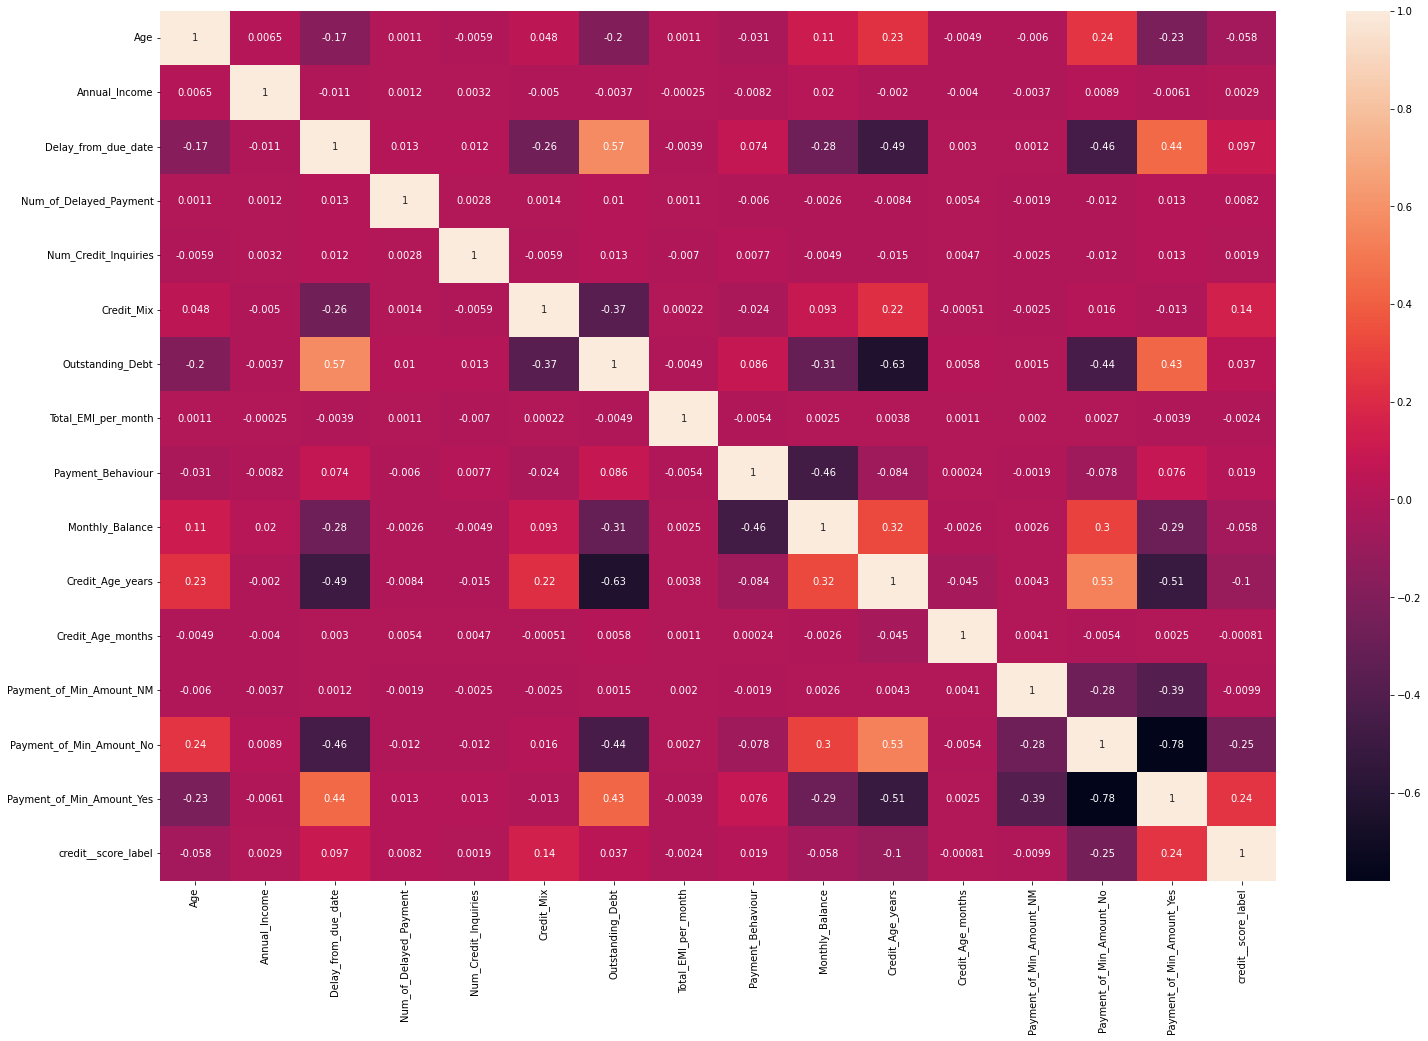

In [84]:
plt.figure(figsize=(25,16))
sns.heatmap(combined_df.corr(),annot=True)

In [85]:
correlation_values = abs(combined_df.corr()["credit__score_label"]).sort_values()
print("Sorted Correlation Values:")
print(correlation_values)

Sorted Correlation Values:
Credit_Age_months            0.000808
Num_Credit_Inquiries         0.001929
Total_EMI_per_month          0.002369
Annual_Income                0.002906
Num_of_Delayed_Payment       0.008163
Payment_of_Min_Amount_NM     0.009854
Payment_Behaviour            0.018793
Outstanding_Debt             0.037153
Monthly_Balance              0.058271
Age                          0.058464
Delay_from_due_date          0.097419
Credit_Age_years             0.102157
Credit_Mix                   0.144913
Payment_of_Min_Amount_Yes    0.243400
Payment_of_Min_Amount_No     0.247100
credit__score_label          1.000000
Name: credit__score_label, dtype: float64


In [86]:
combined_df.isnull().sum()

Age                          2781
Occupation                      0
Annual_Income                   0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Total_EMI_per_month             0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Age_years             9030
Credit_Age_months            9030
Payment_of_Min_Amount_NM        0
Payment_of_Min_Amount_No        0
Payment_of_Min_Amount_Yes       0
credit__score_label             0
dtype: int64

KNN imputation is a technique for filling in missing values by estimating them based on the characteristics of similar neighboring data points. It's considered multivariate because it considers multiple variables or features in the dataset to estimate the missing values.

In [87]:
chunk_size = 5000  # Adjust the chunk size
numerical_data = combined_df.select_dtypes(include=['float64', 'int64']).columns
imputer = KNNImputer(n_neighbors=5)

for chunk_start in range(0, len(combined_df), chunk_size):
    chunk_end = min(chunk_start + chunk_size, len(combined_df))
    chunk_df = combined_df.loc[chunk_start:chunk_end-1, numerical_data]

    chunk_df[numerical_data] = imputer.fit_transform(chunk_df[numerical_data])

    combined_df.loc[chunk_start:chunk_end-1, numerical_data] = chunk_df[numerical_data]


In [88]:
combined_df.isnull().sum()

Age                          0
Occupation                   0
Annual_Income                0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Total_EMI_per_month          0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Age_years             0
Credit_Age_months            0
Payment_of_Min_Amount_NM     0
Payment_of_Min_Amount_No     0
Payment_of_Min_Amount_Yes    0
credit__score_label          0
dtype: int64

In [89]:
table={}
for col in combined_df.columns:
    contingency_table = pd.crosstab(combined_df[col],combined_df['credit__score_label'])
    # Apply the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test results for {col}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}\n")
    table[col]={"Chi-square":chi2,"P":p}

Chi-square test results for Age:
Chi-square statistic: 5208.318384503913
P-value: 0.0
Degrees of freedom: 420

Chi-square test results for Occupation:
Chi-square statistic: 181.1000250439237
P-value: 2.4338587925736514e-24
Degrees of freedom: 28

Chi-square test results for Annual_Income:
Chi-square statistic: 134413.15470134554
P-value: 0.0
Degrees of freedom: 26972

Chi-square test results for Delay_from_due_date:
Chi-square statistic: 24626.21630538984
P-value: 0.0
Degrees of freedom: 134

Chi-square test results for Num_of_Delayed_Payment:
Chi-square statistic: 20620.623273002166
P-value: 0.0
Degrees of freedom: 2088

Chi-square test results for Num_Credit_Inquiries:
Chi-square statistic: 24725.851182154736
P-value: 0.0
Degrees of freedom: 2820

Chi-square test results for Credit_Mix:
Chi-square statistic: 32349.29941440455
P-value: 0.0
Degrees of freedom: 6

Chi-square test results for Outstanding_Debt:
Chi-square statistic: 131136.80570514553
P-value: 0.0
Degrees of freedom: 2440

In [90]:
for col, values in table.items():
    if values['P']>0.05:
        print(f"{col}:\nChi-square: {values['Chi-square']}      P-value: {values['P']:<20}\n")

Monthly_Balance:
Chi-square: 179753.8132882256      P-value: 0.08439107433520428 

Credit_Age_months:
Chi-square: 92.28120638548221      P-value: 0.4136256577084538  



since p value is >0.05 significance level we are dropping these columns

In [91]:
combined_df.drop(["Monthly_Balance","Credit_Age_months","Occupation"],axis=1,inplace=True)

In [92]:
x= combined_df.drop("credit__score_label",axis=1)
y=combined_df['credit__score_label']

In [93]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        100000 non-null  float64
 1   Annual_Income              100000 non-null  float64
 2   Delay_from_due_date        100000 non-null  int64  
 3   Num_of_Delayed_Payment     100000 non-null  float64
 4   Num_Credit_Inquiries       100000 non-null  float64
 5   Credit_Mix                 100000 non-null  int32  
 6   Outstanding_Debt           100000 non-null  float64
 7   Total_EMI_per_month        100000 non-null  float64
 8   Payment_Behaviour          100000 non-null  int64  
 9   Credit_Age_years           100000 non-null  float64
 10  Payment_of_Min_Amount_NM   100000 non-null  float64
 11  Payment_of_Min_Amount_No   100000 non-null  float64
 12  Payment_of_Min_Amount_Yes  100000 non-null  float64
dtypes: float64(10), int32(1), int6

In [94]:
x.describe()

Age  Annual_Income  Delay_from_due_date  \
count  100000.000000   1.000000e+05        100000.000000   
mean       33.311736   1.764157e+05            21.081910   
std        10.751098   1.429618e+06            14.840204   
min        14.000000   7.005930e+03             0.000000   
25%        24.000000   1.945750e+04            10.000000   
50%        33.000000   3.757861e+04            18.000000   
75%        42.000000   7.279092e+04            28.000000   
max        56.000000   2.419806e+07            67.000000   

       Num_of_Delayed_Payment  Num_Credit_Inquiries     Credit_Mix  \
count           100000.000000         100000.000000  100000.000000   
mean                30.900646             27.721794       1.578800   
std                219.633624            191.625960       1.013647   
min                 -3.000000              0.000000       0.000000   
25%                  9.000000              3.000000       1.000000   
50%                 14.000000              6.000000       2.000000   
75%                 18.000000              9.000000       2.000000   
max               4397.000000           2597.000000       3.000000   

       Outstanding_Debt  Total_EMI_per_month  Payment_Behaviour  \
count     100000.000000        100000.000000      100000.000000   
mean        1426.220376          1403.118216           3.001040   
std         1155.129026          8306.041270           1.973083   
min            0.230000             0.000000           0.000000   
25%          566.072500            30.307000           1.000000   
50%         1166.155000            69.249500           3.000000   
75%         1945.962500           161.224000           5.000000   
max         4998.070000         82331.000000           6.000000   

       Credit_Age_years  Payment_of_Min_Amount_NM  Payment_of_Min_Amount_No  \
count     100000.000000             100000.000000             100000.000000   
mean          17.964508                  0.120070                  0.356670   
std            8.288767                  0.325045                  0.479019   
min            0.000000                  0.000000                  0.000000   
25%           12.000000                  0.000000                  0.000000   
50%           18.000000                  0.000000                  0.000000   
75%           25.000000                  0.000000                  1.000000   
max           33.000000                  1.000000                  1.000000   

       Payment_of_Min_Amount_Yes  
count              100000.000000  
mean                    0.523260  
std                     0.499461  
min                     0.000000  
25%                     0.000000  
50%                     1.000000  
75%                     1.000000  
max                     1.000000

In [95]:
toscale=["Age","Annual_Income","Delay_from_due_date","Num_of_Delayed_Payment","Num_Credit_Inquiries","Credit_Mix","Outstanding_Debt","Total_EMI_per_month" ,"Payment_Behaviour"	,"Credit_Age_years"]

In [96]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), toscale)
    ],
    remainder='passthrough' 
)

# Create a pipeline with the preprocessor
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the data
xs = pipeline.fit_transform(x)
joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']

In [97]:
x = pd.DataFrame(xs, columns=x.columns)

In [98]:
x.describe()

Age  Annual_Income  Delay_from_due_date  \
count  1.000000e+05   1.000000e+05         1.000000e+05   
mean   2.000156e-16   3.276796e-17        -1.550976e-16   
std    1.000005e+00   1.000005e+00         1.000005e+00   
min   -1.796266e+00  -1.185006e-01        -1.420601e+00   
25%   -8.661238e-01  -1.097909e-01        -7.467529e-01   
50%   -2.899588e-02  -9.711530e-02        -2.076741e-01   
75%    8.081321e-01  -7.248460e-02         4.661745e-01   
max    2.110331e+00   1.680293e+01         3.094184e+00   

       Num_of_Delayed_Payment  Num_Credit_Inquiries    Credit_Mix  \
count            1.000000e+05          1.000000e+05  1.000000e+05   
mean             3.349183e-16          2.071290e-15  1.201914e-15   
std              1.000005e+00          1.000005e+00  1.000005e+00   
min             -1.543517e-01         -1.446669e-01 -1.557552e+00   
25%             -9.971495e-02         -1.290113e-01 -5.710102e-01   
50%             -7.694965e-02         -1.133557e-01  4.155312e-01   
75%             -5.873741e-02         -9.770016e-02  4.155312e-01   
max              1.987911e+01          1.340784e+01  1.402073e+00   

       Outstanding_Debt  Total_EMI_per_month  Payment_Behaviour  \
count      1.000000e+05         1.000000e+05       1.000000e+05   
mean      -2.233769e-17         5.395517e-17      -1.100053e-16   
std        1.000005e+00         1.000005e+00       1.000005e+00   
min       -1.234492e+00        -1.689283e-01      -1.520998e+00   
25%       -7.446373e-01        -1.652795e-01      -1.014174e+00   
50%       -2.251408e-01        -1.605910e-01      -5.270964e-04   
75%        4.499452e-01        -1.495177e-01       1.013120e+00   
max        3.092181e+00         9.743304e+00       1.519943e+00   

       Credit_Age_years  Payment_of_Min_Amount_NM  Payment_of_Min_Amount_No  \
count      1.000000e+05             100000.000000             100000.000000   
mean      -2.738032e-16                  0.120070                  0.356670   
std        1.000005e+00                  0.325045                  0.479019   
min       -2.167342e+00                  0.000000                  0.000000   
25%       -7.195929e-01                  0.000000                  0.000000   
50%        4.281961e-03                  0.000000                  0.000000   
75%        8.488026e-01                  0.000000                  1.000000   
max        1.813969e+00                  1.000000                  1.000000   

       Payment_of_Min_Amount_Yes  
count              100000.000000  
mean                    0.523260  
std                     0.499461  
min                     0.000000  
25%                     0.000000  
50%                     1.000000  
75%                     1.000000  
max                     1.000000

In [99]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    2
99999    1
Name: credit__score_label, Length: 100000, dtype: int32

Balanced Data

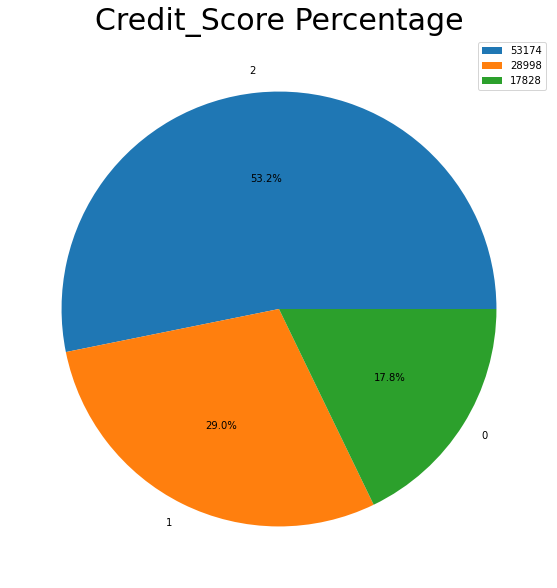

In [100]:
labels = combined_df["credit__score_label"].value_counts().index
sizes = combined_df["credit__score_label"].value_counts()

plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Credit_Score Percentage',color = 'black',fontsize = 30)
plt.legend(combined_df["credit__score_label"].value_counts())
plt.show()

In [101]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        100000 non-null  float64
 1   Annual_Income              100000 non-null  float64
 2   Delay_from_due_date        100000 non-null  int64  
 3   Num_of_Delayed_Payment     100000 non-null  float64
 4   Num_Credit_Inquiries       100000 non-null  float64
 5   Credit_Mix                 100000 non-null  int32  
 6   Outstanding_Debt           100000 non-null  float64
 7   Total_EMI_per_month        100000 non-null  float64
 8   Payment_Behaviour          100000 non-null  int64  
 9   Credit_Age_years           100000 non-null  float64
 10  Payment_of_Min_Amount_NM   100000 non-null  float64
 11  Payment_of_Min_Amount_No   100000 non-null  float64
 12  Payment_of_Min_Amount_Yes  100000 non-null  float64
 13  credit__score_label        100

In [102]:
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [103]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=7)
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

In [104]:
data_after_smote = pd.DataFrame(x_train_sm, columns=x_train.columns)
data_after_smote['target'] = y_train_sm 
data_after_smote['target']

0         1
1         1
2         1
3         0
4         1
         ..
127762    1
127763    1
127764    1
127765    1
127766    1
Name: target, Length: 127767, dtype: int32

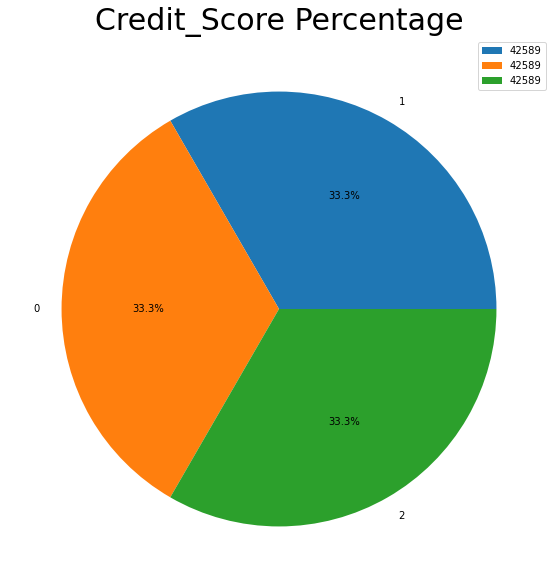

In [105]:
labels = data_after_smote['target'].value_counts().index
sizes = data_after_smote['target'].value_counts()

plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Credit_Score Percentage',color = 'black',fontsize = 30)
plt.legend(data_after_smote['target'].value_counts())
plt.show()

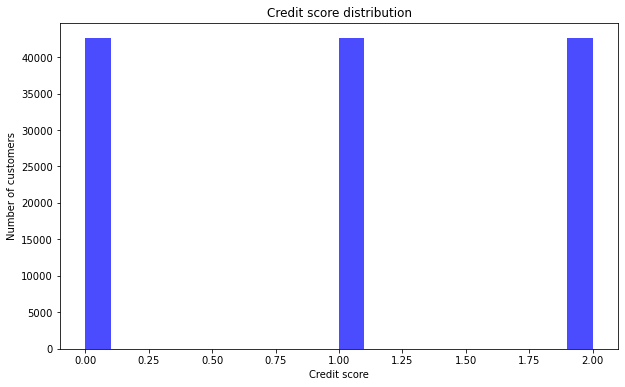

In [106]:
plt.figure(figsize=(10, 6))
plt.hist(data_after_smote['target'], bins=20, color='blue', alpha=0.7)
plt.title('Credit score distribution')
plt.xlabel('Credit score')
plt.ylabel('Number of customers')
plt.show()

In [107]:
X= data_after_smote.drop(['target'],axis=1)
Y=data_after_smote['target']

In [108]:

x_train , x_test , y_train , y_test =train_test_split(X,Y,test_size=0.2,random_state=0)

In [109]:
x_train

Age  Annual_Income  Delay_from_due_date  Num_of_Delayed_Payment  \
98391   0.969143      -0.072450            -0.146198               -0.094337   
101881 -0.828339      -0.108726            -0.597247               -0.106118   
14143  -0.773110      -0.109976             1.948641               -0.063290   
33653   1.608054      -0.107709            -0.746753               -0.049631   
68110   0.436075      -0.031560            -1.420601               -0.140692   
...          ...            ...                  ...                     ...   
45891  -0.270833      -0.103120            -0.814138               -0.140692   
117952 -0.813032      -0.112310             1.077065               -0.048734   
42613  -0.401053      -0.038840             0.264020               -0.136139   
43567  -1.517223      -0.079826             0.668329               -0.054184   
68268  -0.866124      -0.101222             0.398790               -0.054184   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
98391              -0.108595    0.415531         -0.614477   
101881             -0.124771   -0.571010         -0.310986   
14143              -0.113356   -1.557552          2.408011   
33653               1.410454    1.402073         -1.222814   
68110              -0.134230   -0.571010         -0.343574   
...                      ...         ...               ...   
45891              -0.144667   -0.571010         -0.522455   
117952             -0.068789   -1.557552          1.896436   
42613              -0.129011   -0.571010         -0.191530   
43567              -0.102919   -1.557552          1.282045   
68268              -0.102919    0.415531         -0.778913   

        Total_EMI_per_month  Payment_Behaviour  Credit_Age_years  \
98391             -0.167352          -1.014174          1.430161   
101881            -0.161824           1.013120          1.210740   
14143              6.428471          -0.507351         -0.840239   
33653             -0.166877           1.013120          1.693323   
68110              8.683107          -0.000527          1.090094   
...                     ...                ...               ...   
45891             -0.166720           1.013120          0.197315   
117952            -0.160070          -0.000527         -1.459318   
42613             -0.168928          -1.014174          0.245574   
43567              0.213566           1.013120         -0.960884   
68268             -0.165484           1.013120          0.245574   

        Payment_of_Min_Amount_NM  Payment_of_Min_Amount_No  \
98391                        1.0                       0.0   
101881                       1.0                       0.0   
14143                        0.0                       0.0   
33653                        0.0                       0.0   
68110                        1.0                       0.0   
...                          ...                       ...   
45891                        0.0                       1.0   
117952                       0.0                       0.0   
42613                        0.0                       1.0   
43567                        0.0                       0.0   
68268                        0.0                       0.0   

        Payment_of_Min_Amount_Yes  
98391                         0.0  
101881                        0.0  
14143                         1.0  
33653                         1.0  
68110                         0.0  
...                           ...  
45891                         0.0  
117952                        1.0  
42613                         0.0  
43567                         1.0  
68268                         1.0  

[102213 rows x 13 columns]

In [125]:
x_test

Age  Annual_Income  Delay_from_due_date  Num_of_Delayed_Payment  \
59532   1.831288      -0.059072            -1.151062               -0.140692   
9551   -0.494067      -0.038043             0.466175               -0.090609   
25164   0.566295      -0.079402            -0.881523               -0.067844   
110937 -0.897918      -0.084358             0.017514               -0.088039   
84856   0.390474      -0.035874            -0.859498               -0.080670   
...          ...            ...                  ...                     ...   
69126  -0.680095      -0.103572            -0.477213               -0.108821   
43669  -0.028996      -0.102128            -0.544598               -0.136139   
55501   1.180189      -0.079474             2.083411               -0.045078   
25822  -0.122010      -0.101970            -0.477213               -0.081503   
56970   0.622104      -0.116350             1.005253               -0.026866   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
59532              -0.118574   -0.571010         -1.071756   
9551               -0.123793    1.402073         -1.188774   
25164              -0.113356    0.415531         -1.037093   
110937             -0.097833    1.402073          0.343303   
84856              -0.127306    0.415531         -0.881146   
...                      ...         ...               ...   
69126              -0.144667   -0.571010         -0.587384   
43669              -0.134230   -0.571010         -0.793353   
55501              -0.108137   -1.557552          2.353636   
25822              -0.139448    0.415531          0.039814   
56970              -0.087263   -1.557552          1.760150   

        Total_EMI_per_month  Payment_Behaviour  Credit_Age_years  \
59532             -0.143530          -0.507351          0.969448   
9551              -0.133951          -1.014174          0.848803   
25164             -0.159099          -0.000527         -0.767851   
110937            -0.144219          -0.173767         -1.202176   
84856             -0.165419          -1.520998          0.910300   
...                     ...                ...               ...   
69126             -0.168928           1.013120          1.090094   
43669             -0.166104           1.013120          0.124928   
55501             -0.136258           1.519943         -1.926051   
25822             -0.159943           1.519943         -0.237010   
56970             -0.163527           1.013120         -0.960884   

        Payment_of_Min_Amount_NM  Payment_of_Min_Amount_No  \
59532                        0.0                       1.0   
9551                         0.0                       1.0   
25164                        0.0                       0.0   
110937                       0.0                       0.0   
84856                        0.0                       0.0   
...                          ...                       ...   
69126                        1.0                       0.0   
43669                        0.0                       1.0   
55501                        0.0                       0.0   
25822                        0.0                       0.0   
56970                        0.0                       0.0   

        Payment_of_Min_Amount_Yes  
59532                         0.0  
9551                          0.0  
25164                         1.0  
110937                        1.0  
84856                         1.0  
...                           ...  
69126                         0.0  
43669                         0.0  
55501                         1.0  
25822                         1.0  
56970                         1.0  

[25554 rows x 13 columns]

In [110]:
def logistic():
    from sklearn.linear_model import LogisticRegressionCV
    model = LogisticRegressionCV()
    model.fit(x_train, y_train)
    return model


def knn():
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=7)
    model.fit(x_train, y_train)
    return model


#def naive_bayes():
#    from sklearn.naive_bayes import GaussianNB
#    model = GaussianNB()
#    model.fit(x_train, y_train)
#    return model


def decisionTree():
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(max_depth=500)
    model.fit(x_train, y_train)
    return model


def randomForest():
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=500)
    model.fit(x_train, y_train)
    
    return model

#def svm():
#    from sklearn.svm import SVC
#    model = SVC(C=2, kernel='rbf')
#    model.fit(x_train, y_train)
#    return model

def catboost():
    from catboost import CatBoostClassifier
    model = CatBoostClassifier(verbose=False)
    model.fit(x_train, y_train)
    return model


def xgboost():
    from xgboost import XGBClassifier
    model = XGBClassifier()
    model.fit(x_train, y_train)
    return model

# Model Evaluation

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model_test(model):
    y_true = y_test
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred,average="macro")
    recall = recall_score(y_true, y_pred,average="macro")
    f1 = f1_score(y_true, y_pred,average="macro")

    return accuracy, precision, recall, f1

# Evaluation Report

In [112]:
model_functions = [
    {"name": "Logistic Regression", "function": logistic},
    {"name": "K Nearest Neighbour", "function": knn},
    #{"name": "Naive Bayes", "function": naive_bayes},
    {"name": "Decision Tree", "function": decisionTree},
    {"name": "Random Forest", "function": randomForest},
    #{"name": "SVM", "function": svm},
    {"name": "CatBoost", "function": catboost},
    {"name": "XGBoost", "function": xgboost}
]

In [113]:
model_evaluation_report = []

In [114]:
for model_info in model_functions:
    model = model_info["function"]()
    # metrics_train = evaluate_model_train(model)
    metrics_test = evaluate_model_test(model)
    model_evaluation_report.append({
        "name": model_info["name"],
        # "train_accuracy": metrics_train[0],
        # "train_precision": metrics_train[1],
        # "train_recall": metrics_train[2],
        # "train_f1": metrics_train[3],
        "accuracy": metrics_test[0],
        "precision": metrics_test[1],
        "recall": metrics_test[2],
        "f1": metrics_test[3]

    })

In [115]:
df_result = pd.DataFrame(model_evaluation_report)
df_result

name  accuracy  precision    recall        f1
0  Logistic Regression  0.642522   0.640009  0.641932  0.632477
1  K Nearest Neighbour  0.736088   0.737020  0.735716  0.726064
2        Decision Tree  0.752524   0.752603  0.752427  0.752482
3        Random Forest  0.833177   0.832418  0.832971  0.831461
4             CatBoost  0.789857   0.790283  0.789588  0.787440
5              XGBoost  0.792087   0.792210  0.791828  0.789701

In [116]:
import pickle

# Assuming that the Random Forest model is the fifth model in your list
random_forest_model = model_functions[4]["function"]()

# Fit the model on the entire dataset before saving (optional but recommended)
random_forest_model.fit(x_train, y_train)

# Save the trained model to a file using pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)

In [117]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [118]:
import numpy as np
from sklearn.metrics import classification_report
num_classes = y_train.nunique()

model = Sequential()
model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))  # Use softmax for multiclass classification
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

# Assuming you have defined "early_stop" somewhere in your code
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.fit(
    x=x_train,
    y=y_train,  # Convert y_train to categorical if it's not
    epochs=10,
    validation_data=(x_test, y_test),  # Convert y_test to categorical if it's not
    verbose=1,
    callbacks=[early_stop]  # Use the actual EarlyStopping callback instance
)



Epoch 1/25

3195/3195 [==============================] - 6s 2ms/step - loss: 0.9354 - val_loss: 0.8225
Epoch 2/25
3195/3195 [==============================] - 5s 2ms/step - loss: 0.8702 - val_loss: 0.7994
Epoch 3/25
3195/3195 [==============================] - 6s 2ms/step - loss: 0.8530 - val_loss: 0.7866
Epoch 4/25
3195/3195 [==============================] - 6s 2ms/step - loss: 0.8428 - val_loss: 0.7810
Epoch 5/25
3195/3195 [==============================] - 6s 2ms/step - loss: 0.8389 - val_loss: 0.7748
Epoch 6/25
3195/3195 [==============================] - 6s 2ms/step - loss: 0.8364 - val_loss: 0.7772
Epoch 7/25
3195/3195 [==============================] - 6s 2ms/step - loss: 0.8325 - val_loss: 0.7705
Epoch 8/25
3195/3195 [==============================] - 6s 2ms/step - loss: 0.8342 - val_loss: 0.7764
Epoch 9/25
3195/3195 [==============================] - 5s 2ms/step - loss: 0.8316 - val_loss: 0.7677
Epoch 10/25
3195/3195 [==============================] - 5s 2ms/step - loss: 0.

In [119]:
# Predictions for multiclass classification
#predictions = model.predict(x_test)
#predicted_classes = np.argmax(predictions, axis=1)

# Use y_test directly if it's not one-hot encoded
#print(classification_report(y_test, predicted_classes))

In [121]:
predicted_classes_list = []

for i in range(len(x_test)):
    # Extract a single example from x_test
    single_example = x_test.iloc[[i]]

    # Predict for the single example
    single_prediction = model.predict(single_example)
    predicted_class = np.argmax(single_prediction, axis=1)[0]

    # Append the predicted class to the list
    predicted_classes_list.append(predicted_class)

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


In [122]:
predicted_classes_list

[0,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 2,
 0,
 2,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 2,


In [124]:
# Create a new DataFrame for x_test_with_predictions
x_test_with_predictions = x_test.copy()

# Add the predicted classes list as a new column
x_test_with_predictions['Predicted_Classes'] = predicted_classes_list

# Now x_test_with_predictions contains the original features along with the predicted classes
# You can further process or save this DataFrame as needed
x_test_with_predictions

Age  Annual_Income  Delay_from_due_date  Num_of_Delayed_Payment  \
59532   1.831288      -0.059072            -1.151062               -0.140692   
9551   -0.494067      -0.038043             0.466175               -0.090609   
25164   0.566295      -0.079402            -0.881523               -0.067844   
110937 -0.897918      -0.084358             0.017514               -0.088039   
84856   0.390474      -0.035874            -0.859498               -0.080670   
...          ...            ...                  ...                     ...   
69126  -0.680095      -0.103572            -0.477213               -0.108821   
43669  -0.028996      -0.102128            -0.544598               -0.136139   
55501   1.180189      -0.079474             2.083411               -0.045078   
25822  -0.122010      -0.101970            -0.477213               -0.081503   
56970   0.622104      -0.116350             1.005253               -0.026866   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
59532              -0.118574   -0.571010         -1.071756   
9551               -0.123793    1.402073         -1.188774   
25164              -0.113356    0.415531         -1.037093   
110937             -0.097833    1.402073          0.343303   
84856              -0.127306    0.415531         -0.881146   
...                      ...         ...               ...   
69126              -0.144667   -0.571010         -0.587384   
43669              -0.134230   -0.571010         -0.793353   
55501              -0.108137   -1.557552          2.353636   
25822              -0.139448    0.415531          0.039814   
56970              -0.087263   -1.557552          1.760150   

        Total_EMI_per_month  Payment_Behaviour  Credit_Age_years  \
59532             -0.143530          -0.507351          0.969448   
9551              -0.133951          -1.014174          0.848803   
25164             -0.159099          -0.000527         -0.767851   
110937            -0.144219          -0.173767         -1.202176   
84856             -0.165419          -1.520998          0.910300   
...                     ...                ...               ...   
69126             -0.168928           1.013120          1.090094   
43669             -0.166104           1.013120          0.124928   
55501             -0.136258           1.519943         -1.926051   
25822             -0.159943           1.519943         -0.237010   
56970             -0.163527           1.013120         -0.960884   

        Payment_of_Min_Amount_NM  Payment_of_Min_Amount_No  \
59532                        0.0                       1.0   
9551                         0.0                       1.0   
25164                        0.0                       0.0   
110937                       0.0                       0.0   
84856                        0.0                       0.0   
...                          ...                       ...   
69126                        1.0                       0.0   
43669                        0.0                       1.0   
55501                        0.0                       0.0   
25822                        0.0                       0.0   
56970                        0.0                       0.0   

        Payment_of_Min_Amount_Yes  Predicted_Classes  
59532                         0.0                  0  
9551                          0.0                  2  
25164                         1.0                  2  
110937                        1.0                  1  
84856                         1.0                  2  
...                           ...                ...  
69126                         0.0                  0  
43669                         0.0                  0  
55501                         1.0                  1  
25822                         1.0                  1  
56970                         1.0                  1  

[25554 rows x 14 columns]

In [141]:
y_test

59532     0
9551      1
25164     2
110937    1
84856     0
         ..
69126     0
43669     0
55501     2
25822     2
56970     1
Name: target, Length: 25554, dtype: int32

In [142]:
y_test.to_csv('y_test.csv', index=False)

In [126]:
# Specify the path where you want to save the CSV file
csv_path = 'C:/Users/suyas/Desktop/New folder/Project/Credit/predictions.csv'

# Export the DataFrame to a CSV file
x_test_with_predictions.to_csv(csv_path, index=False)

# Print a message indicating the export is complete
print(f"DataFrame exported to {csv_path}")

DataFrame exported to C:/Users/suyas/Desktop/New folder/Project/Credit/predictions.csv
